<a href="https://colab.research.google.com/github/Laxman-Kumar/IST736-TextMiningAssignments/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

<h3>Reading data from CSV</h3>

In [0]:
# reading the data from csv
data = pd.read_csv('FIFA.csv')

<h3>Data Cleaning</h3>

In [0]:
#deleting rows with blank tweets
data['Tweet'].replace('  ', np.nan, inplace=True)
data = data.dropna(subset=['Tweet'])
tweet = data['Tweet']

In [0]:
len(tweet)

529449

<h3>Analyzing data by the source</h3>

In [0]:
source = pd.DataFrame(data.groupby(["Source"]).count()["Tweet"].sort_values())
source = source.where(source["Tweet"]>50)
source = source.dropna()


In [0]:
#source.sort_values(["Tweet"],ascending=False)

<h3>Analyzing data by location</h3>

<h3>Tokenization, Stemming and Vectorization</h3>

In [0]:
#apply tokenization
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [0]:
def stem_tokenize(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #stems = stem_tokenize(tokens , stemmer)
    return ' '.join(tokens)

corpus = []
for item in tweet:
    item = item.lower()
    tokens = tokenize(item)
    corpus.append(tokens)

In [0]:
#tokens = pickle.load( open( "fifaTokens.pickle", "rb" ) )
vectorizer = CountVectorizer(binary=False, min_df = 50, stop_words = stop_words, analyzer = 'word',ngram_range=(1,2))
frequencyVectors = vectorizer.fit_transform(corpus)

In [0]:
tokens = pickle.load( open( "fifaTokens.pickle", "rb" ) )
tfidf = TfidfVectorizer(min_df = 20, stop_words = stop_words, analyzer = 'word',ngram_range=(1,2))
tfidf_matrix =  tfidf.fit_transform(tokens)
words = tfidf.get_feature_names()


Length of vocab  21761


In [0]:
dense = temp[:1000].todense()
denselist = dense.tolist()

In [0]:
#Coded by Laxman Kumar
def convertToCompressedRepresentaion(frequencyVectors):
    sparseMatrix =frequencyVectors.toarray()
    vocabDict = dict(vectorizer.vocabulary_.items())
    vocabDict = dict(zip(vocabDict.values(),vocabDict.keys()))

    compressedRepresentation = []
    for i in range(0,len(sparseMatrix)):
        indices = [i for i, x in enumerate(sparseMatrix[i]) if x !=0]
        temp = {}
        for x in indices:
            temp[x] = sparseMatrix[i][x]
        compressedRepresentation.append(temp)
    return compressedRepresentation
resultset = convertToCompressedRepresentaion(temp[:1000])

<h3>Storing the process corpus</h3>

In [0]:
import pickle

with open('androidComments.pickle', 'wb') as handle:
    pickle.dump(comment_words, handle, protocol=pickle.HIGHEST_PROTOCOL)

#tokens = pickle.load( open( "fifaTokens.pickle", "rb" ) )

<h3>Analyzing by source of tweet</h3>

In [0]:
androidTweets = data[data["Source"]=="Twitter for Android"]["Tweet"]
corpusAndroid = []
for item in androidTweets:
    item = item.lower()
    tokens = tokenize(item)
    corpusAndroid.append(tokens)
androidComments = ' '
for words in corpusAndroid:androidComments = androidComments + words + ''
    
    
iphoneTweets = data[data["Source"]=="Twitter for iPhone"]["Tweet"]
corpusiPhone = []
for item in iphoneTweets:
    item = str(item).lower()
    tokens = tokenize(item)
    corpusiPhone.append(tokens)
comment_words_iphone = ' '
for words in corpusiPhone:comment_words_iphone = comment_words_iphone + words + '

In [0]:
androidComments = comment_words

<h3>Wordcloud of the processed corpus</h3>

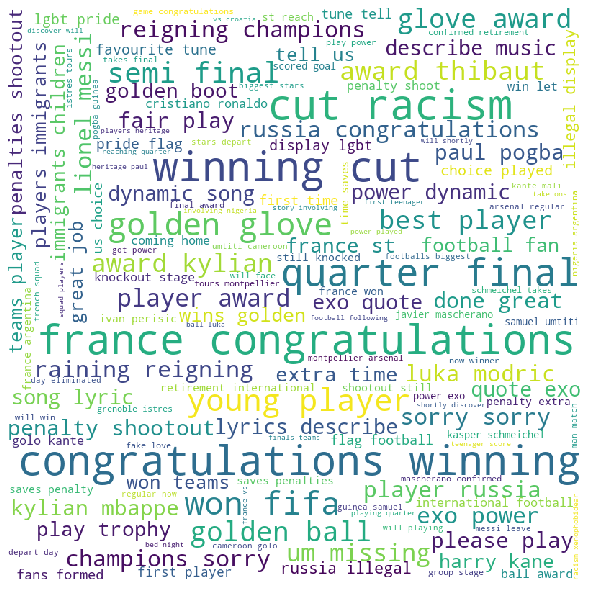

In [0]:
wordcloud_stopwords = list(STOPWORDS) + ["world","cup","world cup","team african","team","african"]
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords =wordcloud_stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()